In [35]:
import pandas as pd
import numpy as np
import json

In [36]:
#Interventions here are automatically counted, manual count is inserted below
results = """
BGR v1 (Nov)
{'mae': 0.27153275613021877, 'rmse': 0.38624637618598856, 'max': 1.7149375548548547, 'failure_rate': 2.816812454605741, 'distance': 7315.052901123929, 'distance_per_intervention': 166.2512022982711, 'interventions': 11, 'whiteness': 41.360333291154326, 'cmd_whiteness': 109.99070489664071, 'expert_whiteness': 23.387318346549534}
BGR v2 (Nov)
{'mae': 0.2906035008268023, 'rmse': 0.3945015027452876, 'max': 1.6012950573699283, 'failure_rate': 3.3145858908841754, 'distance': 8182.546019124199, 'distance_per_intervention': 511.40912619526244, 'interventions': 11, 'whiteness': 27.272656997016664, 'cmd_whiteness': 58.912469477233415, 'expert_whiteness': 23.387318346549534}
BGR v3 (Nov)
{'mae': 0.25259475068591175, 'rmse': 0.3422365360856457, 'max': 1.7086771019286555, 'failure_rate': 1.5388568491977388, 'distance': 8220.317094216764, 'distance_per_intervention': 548.0211396144509, 'interventions': 12, 'whiteness': 35.41893688386236, 'cmd_whiteness': 94.09829760364649, 'expert_whiteness': 23.387318346549534}
BGR overfit (Nov)
{'mae': 0.2707389586595784, 'rmse': 0.4022488477100874, 'max': 1.7189517080682595, 'failure_rate': 4.829513379248052, 'distance': 8301.46969340704, 'distance_per_intervention': 830.146969340704, 'interventions': 7, 'whiteness': 28.364106549976444, 'cmd_whiteness': 68.15811765889585, 'expert_whiteness': 23.387318346549534}
LiDAR v1 (Nov)
{'mae': 0.2164273510701372, 'rmse': 0.28794647831162357, 'max': 1.4814049216935727, 'failure_rate': 0.4200621692010418,'distance': 8442.519560651908, 'distance_per_intervention': 2110.629890162977, 'interventions': 2, 'whiteness': 22.95757235057836, 'cmd_whiteness': 60.71982088365033, 'expert_whiteness': 22.923865138522743}
LiDAR v2 (Nov)
{'mae': 0.23951848356004346, 'rmse': 0.32021653474413686, 'max': 1.410733995029802, 'failure_rate': 0.9813789632611978,'distance': 8465.916553584271, 'distance_per_intervention': 2116.479138396068, 'interventions': 2, 'whiteness': 17.707242631777568, 'cmd_whiteness': 40.788217567179025, 'expert_whiteness': 22.923865138522743}
LiDAR v3 (Nov)
{'mae': 0.2536249345345471, 'rmse': 0.3528786544085774, 'max': 1.6002952563202872, 'failure_rate': 2.1795842800639567, 'distance': 8432.327240726016, 'distance_per_intervention': 1686.465448145203, 'interventions': 3, 'whiteness': 18.841146974682626, 'cmd_whiteness': 56.74452412521819, 'expert_whiteness': 22.923865138522743}
LiDAR overfit (Nov)
{'mae': 0.2598746390647679, 'rmse': 0.3802804511875996, 'max': 1.6692438325569796, 'failure_rate': 4.375209942895532,'distance': 8436.864018329401, 'distance_per_intervention': 2812.2880061098003, 'interventions': 0, 'whiteness': 19.209361200653984, 'cmd_whiteness': 38.54266349696802, 'expert_whiteness': 22.923865138522743}
Camera v1 (May)
{'mae': 0.23088668332126538, 'rmse': 0.30444885103275254, 'max': 1.3838765496927377, 'failure_rate': 0.961781827385472,'distance': 8464.334414890189, 'distance_per_intervention': 2116.083603722547, 'interventions': 2, 'whiteness': 24.62509993931149, 'cmd_whiteness': 65.02619290238128, 'expert_whiteness': 23.387318346549534}
Camera v2 (May)
{'mae': 0.23823662499297601, 'rmse': 0.3130526038207709, 'max': 1.2721541136976486, 'failure_rate': 0.6917558642678205,'distance': 8363.17488650764, 'distance_per_intervention': 1045.396860813455, 'interventions': 4, 'whiteness': 33.46032825076525, 'cmd_whiteness': 107.73348095698013, 'expert_whiteness': 23.387318346549534}
Camera v3 (May)
{'mae': 0.2402807594393857, 'rmse': 0.3086952556841057, 'max': 1.1453249999323865, 'failure_rate': 0.6642254960401941,'distance': 8389.87918022878, 'distance_per_intervention': 932.2087978031977, 'interventions': 7, 'whiteness': 29.698904637469028, 'cmd_whiteness': 67.55371029928838, 'expert_whiteness': 23.387318346549534}
Camera overfit (May)
{'mae': 0.24525640421044248, 'rmse': 0.3291476438504756, 'max': 1.2536699163819658, 'failure_rate': 1.3851891315929674,'distance': 8489.138533056424, 'distance_per_intervention': 2829.7128443521415, 'interventions': 3, 'whiteness': 23.0742793721048, 'cmd_whiteness': 65.94352651549603, 'expert_whiteness': 23.387318346549534}
Lidar v1 (May)
{'mae': 0.26488105713235705, 'rmse': 0.35241952402471255, 'max': 1.5981494596620012, 'failure_rate': 1.5172533379573436, 'distance': 8286.90086341141, 'distance_per_intervention': 517.9313039632132, 'interventions': 19, 'whiteness': 23.659726238390867, 'cmd_whiteness': 49.762369964646204, 'expert_whiteness': 22.923865138522743}
Lidar v2 (May)
{'mae': 0.2672800372922616, 'rmse': 0.3803465468045318, 'max': 1.648004604098236, 'failure_rate': 3.515385289734373, 'distance': 8183.363123433743, 'distance_per_intervention': 389.68395825874967, 'interventions': 17, 'whiteness': 27.250510873446924, 'cmd_whiteness': 52.63703709643017, 'expert_whiteness': 22.923865138522743}
Lidar v3 (May)
{'mae': 0.2786397040002252, 'rmse': 0.39344163616454214, 'max': 1.7227230374446738, 'failure_rate': 3.1959240389069015, 'distance': 7798.206328541252, 'distance_per_intervention': 199.95400842413468, 'interventions': 31, 'whiteness': 40.7326712862529, 'cmd_whiteness': 92.61248810552043, 'expert_whiteness': 22.923865138522743}
Lidar overfit (May)
{'mae': 0.2782872055728993, 'rmse': 0.3985300247306396, 'max': 1.703291612247507, 'failure_rate': 4.693140794223827, 'distance': 7849.634993660165, 'distance_per_intervention': 560.6882138328689, 'interventions': 13, 'whiteness': 31.014602269963902, 'cmd_whiteness': 56.61873046111328, 'expert_whiteness': 22.923865138522743}
LiDAR v2 day 2 (Nov)
{'mae': 0.21934381266983838, 'rmse': 0.31392314409302075, 'max': 1.6426648453005086, 'failure_rate': 1.968503937007874,'distance': 8491.618679568586, 'distance_per_intervention': 2830.5395598561954, 'interventions': 0, 'whiteness': 19.17217743456574, 'cmd_whiteness': 33.89063165134626, 'expert_whiteness': 22.923865138522743}
"""

In [37]:
results = results.split('\n')[1:-1]
names = results[::2]
experiment_results = results[1::2]

In [38]:
import warnings
warnings.filterwarnings('ignore')

metrics_df = pd.DataFrame(columns=["model", 'mae', 'rmse', 'max', 'failure_rate', 'distance', 'distance_per_intervention', 'interventions', 'whiteness', 'cmd_whiteness', 'expert_whiteness'])
for name, res in zip(names, experiment_results):
    print(name)
    res = json.loads(res.replace("'", '"'))
    metrics = pd.DataFrame(data=res, index=[0])
    metrics['model'] = name
    metrics_df = metrics_df.append(metrics, ignore_index=True)
metrics_df.set_index("model");
metrics_df = metrics_df[["model", "mae",'failure_rate', 'distance', 'distance_per_intervention', 'interventions', 'whiteness', 'cmd_whiteness', 'expert_whiteness']]
metrics_df


BGR v1 (Nov)
BGR v2 (Nov)
BGR v3 (Nov)
BGR overfit (Nov)
LiDAR v1 (Nov)
LiDAR v2 (Nov)
LiDAR v3 (Nov)
LiDAR overfit (Nov)
Camera v1 (May)
Camera v2 (May)
Camera v3 (May)
Camera overfit (May)
Lidar v1 (May)
Lidar v2 (May)
Lidar v3 (May)
Lidar overfit (May)
LiDAR v2 day 2 (Nov)


,model,mae,failure_rate,distance,distance_per_intervention,interventions,whiteness,cmd_whiteness,expert_whiteness
0,BGR v1 (Nov),0.271533,2.816812,7315.052901,166.251202,11,41.360333,109.990705,23.387318
1,BGR v2 (Nov),0.290604,3.314586,8182.546019,511.409126,11,27.272657,58.912469,23.387318
2,BGR v3 (Nov),0.252595,1.538857,8220.317094,548.021140,12,35.418937,94.098298,23.387318
3,BGR overfit (Nov),0.270739,4.829513,8301.469693,830.146969,7,28.364107,68.158118,23.387318
4,LiDAR v1 (Nov),0.216427,0.420062,8442.519561,2110.629890,2,22.957572,60.719821,22.923865
5,LiDAR v2 (Nov),0.239518,0.981379,8465.916554,2116.479138,2,17.707243,40.788218,22.923865
6,LiDAR v3 (Nov),0.253625,2.179584,8432.327241,1686.465448,3,18.841147,56.744524,22.923865
7,LiDAR overfit (Nov),0.259875,4.375210,8436.864018,2812.288006,0,19.209361,38.542663,22.923865
8,Camera v1 (May),0.230887,0.961782,8464.334415,2116.083604,2,24.625100,65.026193,23.387318
9,Camera v2 (May),0.238237,0.691756,8363.174887,1045.396861,4,33.460328,107.733481,23.387318


In [39]:
OL_white = [99.0, 74.5, 90.5, 116.0,   #bgr
          52.4, 30.1, 41.0, 27.3,  #lid nov
          63.201572, 54.70426, 63.663876, 59.91,
          64.41,59.8,90.7,73.7,   
          30.1]
metrics_df.insert(8, 'ol_season_whiteness', OL_white)

metrics_df.insert(9, 'ol_mae', [7.23,6.91,7.46,6.86, #bgr
                                 5.93,6.05,5.88,4.02, #lid nov
                                 6.2567,6.7220,6.6836,5.9565, #cam spring
                                 7.54,8.03,9.64,7.88,#lid spring
                                 6.05])#day2 nov

In [40]:
metrics_df["distance_per_intervention"] = metrics_df.apply(lambda x: x['distance']/(x['interventions']) if x['interventions'] != 0 else x['distance'], axis=1)

In [41]:
metrics_df.rename(columns={'whiteness': 'cl_whiteness'}, inplace=True)
metrics_df.rename(columns={'cmd_whiteness': 'cl_cmd_whiteness'}, inplace=True)
metrics_df.rename(columns={'mae': 'cl_mae'}, inplace=True)

In [42]:
metrics_df = metrics_df.astype({"interventions": float})

In [43]:
metrics_df.drop(['distance', 'expert_whiteness'], axis=1, inplace=True)

In [59]:
metrics_df["combined"] = (metrics_df["ol_mae"]-metrics_df["ol_mae"].mean())/metrics_df["ol_mae"].std() + (metrics_df["ol_season_whiteness"]-metrics_df["ol_season_whiteness"].rank())/metrics_df["ol_season_whiteness"].std()

metrics_df["distance_per_intervention"][7]=10000
metrics_df["distance_per_intervention"][16]=10000
#print(metrics_df)

In [60]:
#metrics_df.drop(['interventions'], axis=1, inplace=True)

cols = metrics_df.columns.tolist()
print(cols)
order=['model', 'distance_per_intervention', 'cl_mae', 'failure_rate','cl_cmd_whiteness','cl_whiteness','ol_mae','ol_season_whiteness','combined']
metrics_df=metrics_df[order]

metrics_df.style.format({
    'cl_mae': "{:.4f}m",
    'rmse': "{:.4f}m",
    'max': "{:.4f}m",
    'failure_rate': "{:.2f}%",
    'interventions': "{:.0f}",
    'cl_whiteness': "{:.2f}°/s",
    'ol_whiteness': "{:.2f}°/s",
    'cl_cmd_whiteness': "{:.2f}°/s",
    'ol_season_whiteness': "{:.2f}°/s",
    'ol_mae': "{:.2f}°",
    'distance': "{:.2f}m",
    'distance_per_intervention': "{:.2f}m"
})

['model', 'distance_per_intervention', 'cl_mae', 'failure_rate', 'cl_cmd_whiteness', 'cl_whiteness', 'ol_mae', 'ol_season_whiteness', 'combined']


,model,distance_per_intervention,cl_mae,failure_rate,cl_cmd_whiteness,cl_whiteness,ol_mae,ol_season_whiteness,combined
0,BGR v1 (Nov),665.00m,0.2715m,2.82%,109.99°/s,41.36°/s,7.23°,99.00°/s,3.703541
1,BGR v2 (Nov),743.87m,0.2906m,3.31%,58.91°/s,27.27°/s,6.91°,74.50°/s,2.577991
2,BGR v3 (Nov),685.03m,0.2526m,1.54%,94.10°/s,35.42°/s,7.46°,90.50°/s,3.633461
3,BGR overfit (Nov),1185.92m,0.2707m,4.83%,68.16°/s,28.36°/s,6.86°,116.00°/s,4.038257
4,LiDAR v1 (Nov),4221.26m,0.2164m,0.42%,60.72°/s,22.96°/s,5.93°,52.40°/s,1.202971
5,LiDAR v2 (Nov),4232.96m,0.2395m,0.98%,40.79°/s,17.71°/s,6.05°,30.10°/s,0.509354
6,LiDAR v3 (Nov),2810.78m,0.2536m,2.18%,56.74°/s,18.84°/s,5.88°,41.00°/s,0.745176
7,LiDAR overfit (Nov),10000.00m,0.2599m,4.38%,38.54°/s,19.21°/s,4.02°,27.30°/s,-1.221416
8,Camera v1 (May),4232.17m,0.2309m,0.96%,65.03°/s,24.63°/s,6.26°,63.20°/s,1.745492
9,Camera v2 (May),2090.79m,0.2382m,0.69%,107.73°/s,33.46°/s,6.72°,54.70°/s,1.910144


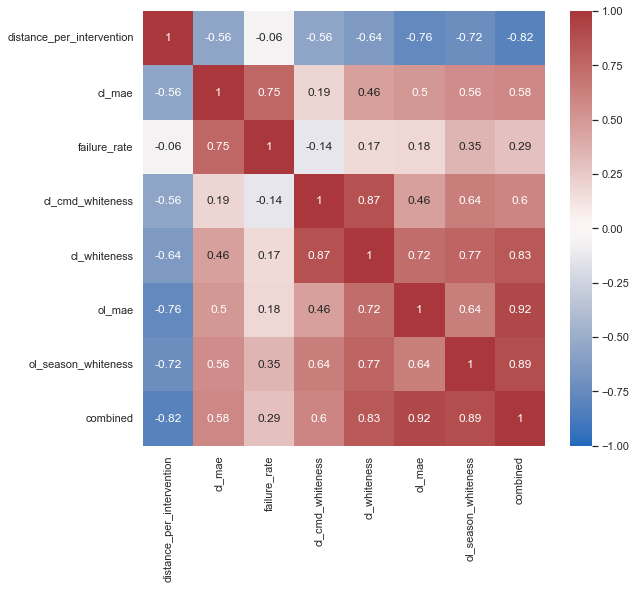

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 8))
corr_mat = metrics_df.corr().round(2)
sns.heatmap(corr_mat, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [62]:
import numpy as np
import scipy

r_mae = scipy.stats.pearsonr(metrics_df["distance_per_intervention"], metrics_df["ol_mae"])[0]
print("rmae=",r_mae)
def pearsonr_significance(x, y,z, ci=90, n_boots=10000):
    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)
   
 # (n_boots, n_observations) paired arrays
    rand_ixs = np.random.randint(0, x.shape[0], size=(n_boots, x.shape[0]))
    x_boots = x[rand_ixs]
    y_boots = y[rand_ixs]
    z_boots = z[rand_ixs]
    
    # differences from mean
    x_mdiffs = x_boots - x_boots.mean(axis=1)[:, None]
    y_mdiffs = y_boots - y_boots.mean(axis=1)[:, None]
    z_mdiffs = z_boots - z_boots.mean(axis=1)[:, None]
    
    # sums of squares
    x_ss = np.einsum('ij, ij -> i', x_mdiffs, x_mdiffs)
    y_ss = np.einsum('ij, ij -> i', y_mdiffs, y_mdiffs)
    z_ss = np.einsum('ij, ij -> i', z_mdiffs, z_mdiffs)
    
    # pearson correlations
    r_boots1 = np.einsum('ij, ij -> i', x_mdiffs, y_mdiffs) / np.sqrt(x_ss * y_ss)
    r_boots2 = np.einsum('ij, ij -> i', x_mdiffs, z_mdiffs) / np.sqrt(x_ss * z_ss)

    # upper and lower bounds for confidence interval
    print(np.mean(r_boots1-r_boots2))
    ci_low = np.percentile(r_boots1-r_boots2, (100 - ci) / 2)
    ci_high = np.percentile(r_boots1-r_boots2, (ci + 100) / 2)
    print("proportion of times pearsonr(cpi,MAE was stronger):", np.sum(r_boots1-r_boots2>0)/10000)
    return ci_low, ci_high

print(pearsonr_significance(metrics_df["distance_per_intervention"], metrics_df["ol_season_whiteness"], metrics_df["ol_mae"]))


rmae= -0.7600861527041063
0.049197261564370834
proportion of times pearsonr(cpi,MAE was stronger): 0.6271
(-0.14731985628972638, 0.2704690231786432)


In [31]:
import numpy as np
import scipy

r_mae = scipy.stats.pearsonr(metrics_df["distance_per_intervention"], metrics_df["ol_mae"])[0]
print("rmae=",r_mae)
def pearsonr_significance(x, y,z, ci=90, n_boots=10000):
    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)
   
 # (n_boots, n_observations) paired arrays
    rand_ixs = np.random.randint(0, x.shape[0], size=(n_boots, x.shape[0]))
    x_boots = x[rand_ixs]
    y_boots = y[rand_ixs]
    z_boots = z[rand_ixs]
    
    # differences from mean
    x_mdiffs = x_boots - x_boots.mean(axis=1)[:, None]
    y_mdiffs = y_boots - y_boots.mean(axis=1)[:, None]
    z_mdiffs = z_boots - z_boots.mean(axis=1)[:, None]
    
    # sums of squares
    x_ss = np.einsum('ij, ij -> i', x_mdiffs, x_mdiffs)
    y_ss = np.einsum('ij, ij -> i', y_mdiffs, y_mdiffs)
    z_ss = np.einsum('ij, ij -> i', z_mdiffs, z_mdiffs)
    
    # pearson correlations
    r_boots1 = np.einsum('ij, ij -> i', x_mdiffs, y_mdiffs) / np.sqrt(x_ss * y_ss)
    r_boots2 = np.einsum('ij, ij -> i', x_mdiffs, z_mdiffs) / np.sqrt(x_ss * z_ss)

    # upper and lower bounds for confidence interval
    print(np.mean(r_boots1-r_boots2))
    ci_low = np.percentile(r_boots1-r_boots2, (100 - ci) / 2)
    ci_high = np.percentile(r_boots1-r_boots2, (ci + 100) / 2)
    print("proportion of times pearsonr(cpi,MAE was stronger):", np.sum(r_boots1-r_boots2>0)/10000)
    return ci_low, ci_high

print(pearsonr_significance(metrics_df["distance_per_intervention"], metrics_df["combined"], metrics_df["ol_mae"]))


rmae= -0.7600861527041063
-0.04929192100694978
proportion of times pearsonr(cpi,MAE was stronger): 0.1679
(-0.1374652326356388, 0.04297133666977417)


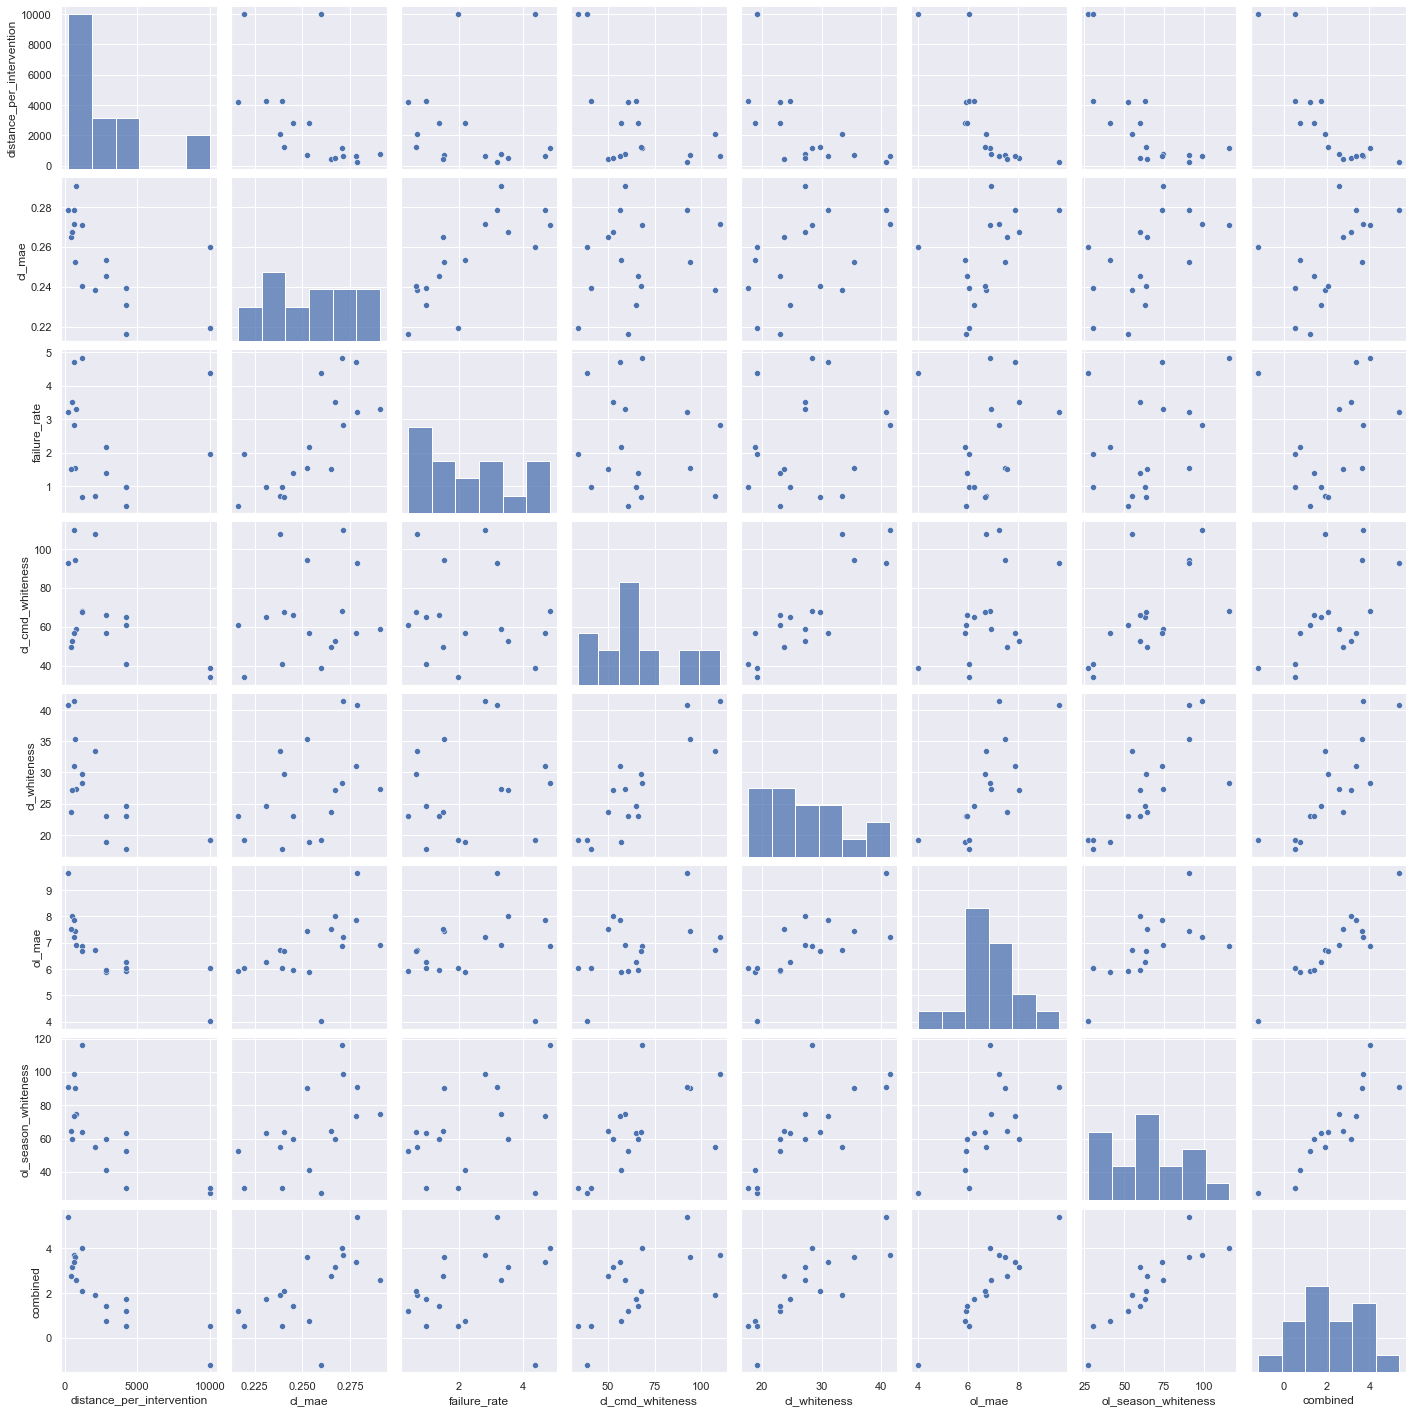

In [32]:
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#sns.set(rc={'figure.facecolor':'white'})
sns.pairplot(metrics_df)
plt.savefig('metrics_pairwise.png', facecolor="white", edgecolor="none", transparent=False)

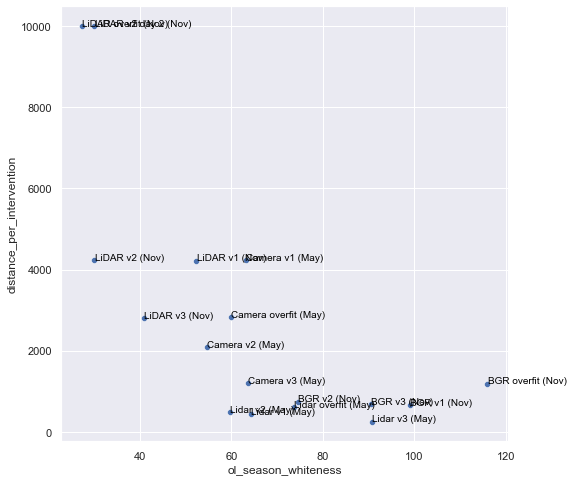

In [33]:
sns.set(rc = {'figure.figsize':(8,8), 'figure.facecolor':'white'})
sc_plot = sns.scatterplot(metrics_df['ol_season_whiteness'], metrics_df['distance_per_intervention'])

for line in range(0, metrics_df.shape[0]):
     sc_plot.text(metrics_df.ol_season_whiteness[line]+0.01, metrics_df.distance_per_intervention[line], 
     metrics_df.model[line], horizontalalignment='left', 
     size='small', color='black')

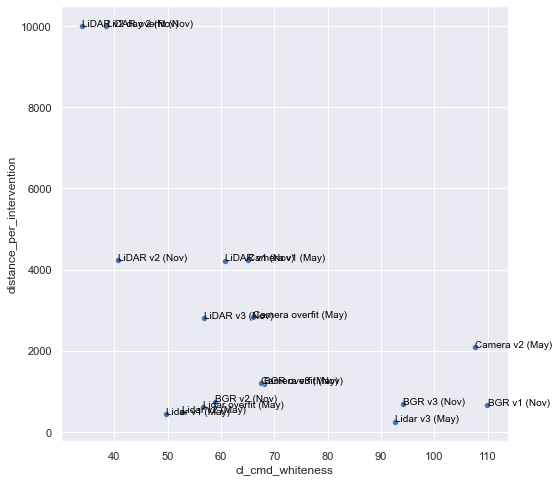

In [34]:
sns.set(rc = {'figure.figsize':(8,8), 'figure.facecolor':'white'})
sc_plot = sns.scatterplot(metrics_df['cl_cmd_whiteness'], metrics_df['distance_per_intervention'])
#sns.regplot(x="closed_loop_whiteness", y="distance_per_intervention", data=metrics_df, order=2, ci=None)

for line in range(0, metrics_df.shape[0]):
     sc_plot.text(metrics_df.cl_cmd_whiteness[line]+0.01, metrics_df.distance_per_intervention[line], 
     metrics_df.model[line], horizontalalignment='left', 
     size='small', color='black')